Compute and represent the time series of sea level derived from the water pressure at 6 meters and the atmospheric pressure at sea level.

# Import modules

In [11]:
import os
import glob
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib  import colors
import datetime, time, calendar
import matplotlib.text as text
import matplotlib as mpl
%matplotlib inline

# Files and directories

In [2]:
figdir='/home/ctroupin/Projects/201530627_Rissaga/20160207/SeaWaterPressure/'
figbasename='rissaga_p_'
ciutadellafile1 = 'http://thredds.socib.es/thredds/dodsC/mooring/current_profiler/station_ciutadella-ime_awac001/L1/dep0001_station-ciutadella_ime-awac001_L1_latest.nc'
ciutadellafile2 = 'http://thredds.socib.es/thredds/dodsC/mooring/barometer/station_ciutadella-scb_baro005/L1/dep0001_station-ciutadella_scb-baro005_L1_latest.nc'

Parameters

In [20]:
rho = 1028.
g = 9.81
href = 6.

Define time limits for the plot

In [23]:
timeinit,timeend = datetime.datetime(2016, 2, 7, 0, 0), datetime.datetime(2016, 2, 7, 15, 0)
tmin, tmax = time.mktime(timeinit.timetuple()), time.mktime(timeend.timetuple())

# Read data

Load the data from the AWAC

In [24]:
with netCDF4.Dataset(ciutadellafile1,'r+', format='NETCDF4') as nc:
    time_water_pressure = nc.variables['time'][:]
    time_water_pressure_units = nc.variables['time'].units
    goodtime = np.where(np.logical_and((time_water_pressure<=tmax),(time_water_pressure>=tmin)))[0]
    water_pressure = nc.variables['WTR_PRE'][goodtime]
    time_water_pressure = time_water_pressure[goodtime]

Load the data from the barometer

In [25]:
with netCDF4.Dataset(ciutadellafile2,'r+', format='NETCDF4') as nc:
    time_air_pressure = nc.variables['time'][:]
    time_air_pressure_units = nc.variables['time'].units
    goodtime = np.where(np.logical_and((time_air_pressure<=tmax),(time_air_pressure>=tmin)))[0]
    air_pressure = nc.variables['AIR_PRE'][goodtime]
    time_air_pressure = time_air_pressure[goodtime]

## Figure to check

Convert time

In [26]:
time_water_pressure2 = netCDF4.num2date(time_water_pressure, time_water_pressure_units)
time_air_pressure2 = netCDF4.num2date(time_air_pressure, time_air_pressure_units)

Convert pressure to common units ($N/m^2$)

In [27]:
water_pressure *= 10000.
air_pressure *= 100.

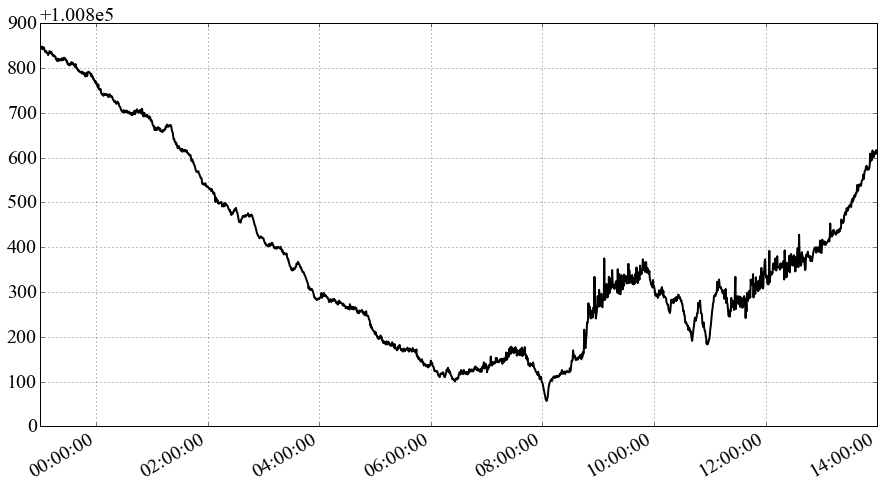

In [32]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

fig = plt.figure(figsize=(15, 8))
# plt.plot(time_water_pressure2, water_pressure, 'b')
plt.plot(time_air_pressure2, air_pressure, 'k')
plt.grid()
fig.autofmt_xdate()
plt.show()

## Compute sea level height

In [29]:
print len(water_pressure)

901


In [30]:
sea_level = water_pressure / (rho *g) - href

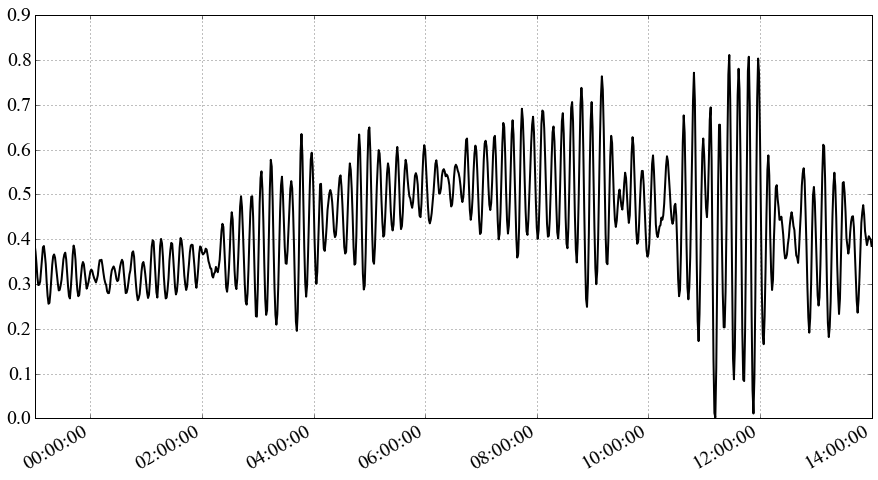

In [31]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

fig = plt.figure(figsize=(15, 8))
plt.plot(time_water_pressure2, sea_level, 'k')
plt.grid()
fig.autofmt_xdate()
plt.show()

In [ ]:
ii = 1
for tt, press in zip(pressure_time, pressure):
    fig = plt.figure(num=None, figsize=(10, 6))
    #fig.patch.set_alpha(0.)
    plt.plot(pressure_time, pressure, 'k')
    plt.plot(tt, press, 'ro', ms=10)
    #plt.title(time.strftime("%H:%M:%S", time.gmtime(tt)))
    plt.axis('off')

    plt.savefig(figdir+figbasename+str(ii).zfill(4), dpi=300, facecolor='None', edgecolor='w',
         transparent=True, bbox_inches='tight', pad_inches=0.1)
    ii += 1
    plt.close()